## Get SCP calculations for POS tags and Bigrams as alignment features

This notebook was primarily experimental in determining the correct functions to represent SCP cohesion and accommodation scores to put into a .py file for easy access across further experiments. Results for POS tags and SCP cohesion measure generated here as well.

In [1]:
import pandas as pd
import sys
import csv
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import seaborn as sns 
import random

# Import the tweet tagger from working directory
import CMUTweetTaggerWindows as tagger
from collections import Counter

In [5]:
## To run when parsing pos tags, generating bigrams, or getting sentiment from tokens
dataA = pd.read_csv('A_Tweets_Tagged.txt', sep='\t', header=None)
dataA.columns = ['Tokens', 'Tags', 'Conf','Raw Tweet']

dataB = pd.read_csv('B_Tweets_Tagged.txt', sep='\t', header=None)
dataB.columns = ['Tokens', 'Tags', 'Conf','Raw Tweet']

### POS Tags

In [43]:
# Generate counter dictionaries for each tweet's part of speech tags

countdictA = []
for tags in dataA.Tags: 
    count = Counter(tags)
    countdictA.append(count)
    
countdictB = []
for tags in dataB.Tags: 
    count = Counter(tags)
    countdictB.append(count)
    
print(len(countdictA),len(countdictB))

326167 326167


In [12]:
## When importing data again, need to fill blank tag data with 'B' -- not in tagset so 'null'
nan_rows = dataA[dataA['Tags'].isnull()]
dataA.fillna({'Tags':'B'}, inplace=True)
dataB.fillna({'Tags':'B'}, inplace=True)

In [35]:
# Delete last item from countdictA to even out conversational turns

del(countdictA[326167])
len(countdictA)

326167

In [1]:
# Import .py code file containing functions relevent to this measure (SCP): SCP_Code.py
import SCP_Code as scp

In [ ]:
# Create list of list of shared markers between atweets and btweets

markerdict = scp.getSharedMarkers(countdictA,countdictB)

In [19]:
# markerdict = sharedtags2.txt - sep = '|'
# Load previously generated list of shared tags, saved as csv instead of running above code. 

with open ('sharedtags2.csv','r') as file: 
    reader = csv.reader(file, delimiter = '|')
    markerdict = list(reader)
    
print(markerdict[0:5])

[['V', 'O', 'N', 'P', ',', '^', ''], ['V', 'O', 'N', 'P', ',', '^', ''], [',', 'V', ''], ['R', 'V', 'O', 'P', 'A', ',', ''], [',', 'O', 'V', 'R', '^', 'P', 'A', '']]


In [20]:
len(markerdict)

326167

In [21]:
# Scramble replies in countdictB for random control and baseline
shuffledCountDictB = random.sample(countdictB,len(countdictB))

#Get shared markers
shuffledMarkers = scp.getSharedMarkers(countdictA,shuffledCountDictB)

In [46]:
len(shuffledCountDictB)

326167

In [70]:
# Set marks as part of speech tags

marks = ['P','D','O','&','N','S','^','Z','L','M','V','A','R','!','T','X','Y','#','U','E','$',',','G']
len(marks)

23

In [78]:
allCohesionScores = scp.CalculateAllCohesion(marks,markerdict,shuffledSharedMarkers)
allCohesionScores

{'P': [0.49723914436469663, 0.47176446421618373, 0.025474680148512896],
 'D': [0.41858311846385443, 0.39632151627847084, 0.02226160218538359],
 'O': [0.4847854013434836, 0.4631277842332302, 0.02165761711025338],
 '&': [0.09306582210953285, 0.0799161165905809, 0.013149705518951949],
 'N': [0.6676365174895069, 0.6485910591813396, 0.019045458308167285],
 'S': [0.00010117516486953002, 4.2922797217376376e-05, 5.8252367652153646e-05],
 '^': [0.1241449932090003, 0.09080317751335971, 0.033341815695640584],
 'Z': [0.0007572807794779975, 0.00013490021982604005, 0.0006223805596519574],
 'L': [0.08928861595440372, 0.07608678989597353, 0.013201826058430191],
 'M': [0.0, 0.0, 0.0],
 'V': [0.7554013741426938, 0.7396027188526123, 0.01579865529008151],
 'A': [0.38877016988229957, 0.35874873914283173, 0.030021430739467836],
 'R': [0.365748221003351, 0.342625096959533, 0.023123124043818],
 '!': [0.08445366943927497, 0.07020943259127993, 0.014244236847995043],
 'T': [0.00804802447825807, 0.005417470191650

In [ ]:
CohesionDF = pd.DataFrame.from_dict(allCohesionScores,orient = 'index')#,columns = ['TweetReply Cohesion', 'RandomReply Cohesion',
                                                   #   'Subtractive Cohesion Score'])
CohesionDF.head()

In [159]:
CohesionDF.columns = ['TweetReply Cohesion', 'RandomReply Cohesion','Subtractive Cohesion Score']
CohesionDF.head()

,TweetReply Cohesion,RandomReply Cohesion,Subtractive Cohesion Score
P,0.497239,0.471764,0.025475
D,0.418583,0.396322,0.022262
O,0.484785,0.463128,0.021658
&,0.093066,0.079916,0.013150
N,0.667637,0.648591,0.019045


In [ ]:
CohesionToPlot = CohesionDF.copy()
CohesionToPlot.drop(['TweetReply Cohesion'],axis = 1, inplace = True)
CohesionToPlot.drop(['RandomReply Cohesion'],axis = 1, inplace = True)
CohesionToPlot

In [88]:
# Write dataframe to latex
with open ('CohesionTable.tex','w') as tf:
    tf.write(CohesionDF.to_latex())

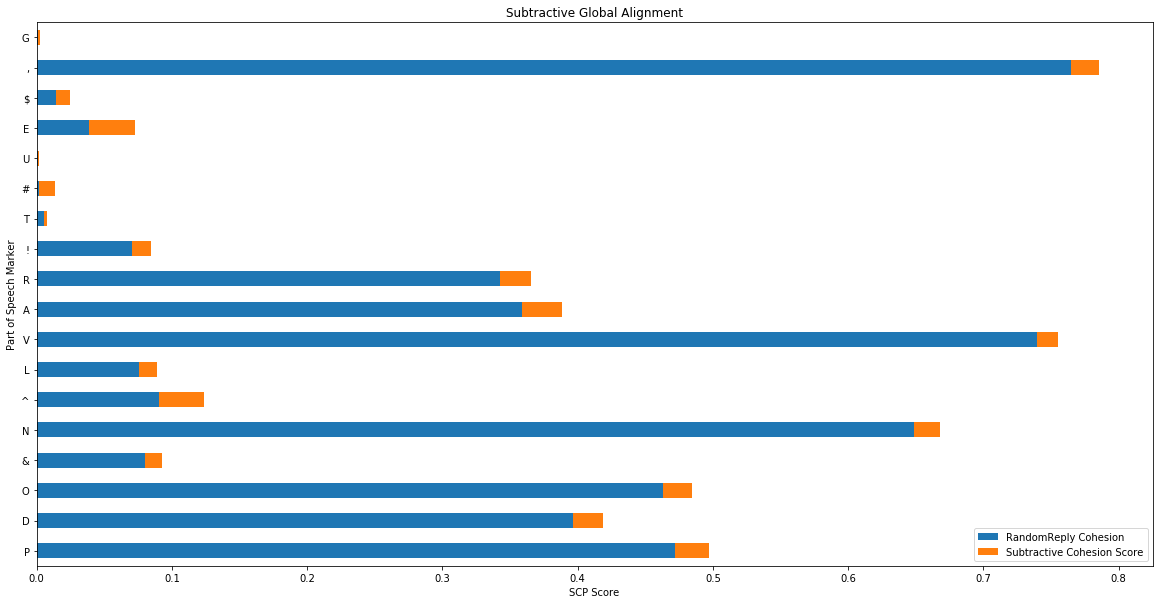

In [111]:
# Visualize dataframe to horizontal bar chart
plot1 = CohesionToPlot.plot(kind = 'barh', stacked = True,figsize = (20,10))
                    
#plot1.tick_params(labelbottom=False, bottom=False,which='both')
plt.xlabel('SCP Score')
plt.ylabel('Part of Speech Marker')
plt.title('Subtractive Global Alignment')
plt.savefig('SubtractiveGlobalAlignment')

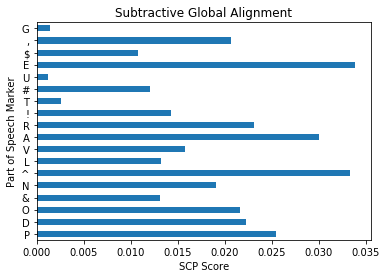

In [117]:
# Plot just the subtractive score. 
# Visualize dataframe to horizontal bar chart
plot1 = CohesionToPlot.plot(kind = 'barh',legend = False)#,figsize = (20,10))
                    
#plot1.tick_params(labelbottom=False, bottom=False,which='both')
plt.xlabel('SCP Score')
plt.ylabel('Part of Speech Marker')
plt.title('Subtractive Global Alignment')
plt.savefig('SubtractiveGlobalAlignment_JustDiffScore_ShowsClearestResults')

## Bigrams

In [2]:

bigramsA = bi.AllBigramsinTweetset(dataA.Tags)

bigramsB = bi.AllBigramsinTweetset(dataB.Tags)

In [ ]:
tupleBigramsA = bi.convertToTuples(bigramsA)
tupleBigramsB = bi.convertToTuples(bigramsB)

In [ ]:
# Scramble replies in tupleBigramsB for random 

shuffledB = random.sample(tupleBigramsB,len(tupleBigramsB))
print(shuffledB[0:2])

In [ ]:
# First make list of lists by flattening: 

singleListBigramsA = [y for x in tupleBigramsA for y in x]
singleListBigramsB = [y for x in tupleBigramsB for y in x]

print(len(singleListBigramsA),len(singleListBigramsB))

In [ ]:
bigramsFreqA = Counter(singleListBigramsA)
bigramsFreqB = Counter(singleListBigramsB)

# Set the topBigrams to use as markers
totalBigramFreq = bigramsFreqB+bigramsFreqA
topBigrams = totalBigramFreq.most_common(50)
topBigrams[0:10]

In [ ]:
topBigramsOnly = [item[0] for item in topBigrams]
topBigramsOnly[0]

In [ ]:
sharedBigAB = scp.getSharedMarkers(tupleBigramsA,tupleBigramsB)
sharedBigARand = scp.getSharedMarkers(tupleBigramsA,shuffledB)

In [ ]:
AllBiCohesion = scp.CalculateAllCohesion(markers,sharedAB,sharedARand)

In [ ]:
CohesionBiDF = pd.DataFrame.from_dict(AllBiCohesion,orient = 'index')
CohesionBiDF.columns = ['TweetReply Minuend', 'RandomReply Subtrahend','Subtractive Cohesion']
CohesionBiDF.head()

In [ ]:
CohesionToPlot2 = CohesionBiDF.copy()
CohesionToPlot2.drop(['TweetReply Minuend'],axis = 1, inplace = True)
CohesionToPlot.drop(['RandomReply Subtrahend'],axis = 1, inplace = True)

In [ ]:
# Visualize dataframe to horizontal bar chart
plot1 = CohesionToPlot.sort_values('Subtractive Cohesion').plot(kind = 'barh', stacked = True,figsize = (20,10))
                    
#plot1.tick_params(labelbottom=False, bottom=False,which='both')
plt.xlabel('SCP Score')
plt.ylabel('Bigram Marker')
plt.title('Subtractive Global Alignment')
plt.savefig('BigramSCP')